In this example, we consider plane channel flow with $\text{Re} \to 0$, known as Poiseuille flow. The domain $\Omega$ is thus a rectangle $(0, L)\times(0,H)$, on which we solve the system
\begin{equation*}
\begin{cases}
- \mu \Delta \mathbf{u} + \nabla p &= 0 \\
\nabla \cdot \mathbf{u} &= 0 \\
\text{+ b.c.}
\end{cases}
\end{equation*}

Under suitable assumptions (see Kundu, for example), with uniform pressure gradient
$$ G = - \dfrac{\partial p}{\partial x}$$
we get as exact solution the parabolic profile
$$ u(x, y) = u(y) = \dfrac{G}{2\mu} y (H-y). $$
The maximum velocity is reached on the centerline and it is
$$ u_{max} = \dfrac{G H^2}{8 \mu} = \dfrac{3}{2} \overline{u}$$
where $\overline{u}$ is the mean velocity.

We enforce the following boundary conditions:

* No slip condition on the walls $\Gamma_w$ (top and bottom boundaries): $\mathbf{u} = 0$

* Uniform flow at the inlet $\Gamma_{in}$ (left boundary): $\mathbf{u} = (1, 0)$

* Stress condition at the outlet $\Gamma_{out}$ (right boundary):
\begin{equation*}
\boldsymbol{\tau} \cdot \hat{\mathbf{x}} = 0 \to -p\hat{\mathbf{x}} + \dfrac{\partial \mathbf{u}}{\partial x} = 0.
\end{equation*}

The latter is also known as the *do-nothing* condition, because it requires no addition to the weak form of the momentum equation:
\begin{equation*}
\int_\Omega \left( \mu \nabla \mathbf{u} : \nabla \mathbf{v} - p \nabla \cdot \mathbf{v} \right) \mathrm{d\Omega} = \int_{\Gamma_r} \left( -p\hat{\mathbf{n}} + \dfrac{\partial \mathbf{u}}{\partial n} \right) \mathrm{d\Gamma}
\end{equation*}

In [ ]:
from fenics import *

/usr/lib/python3/dist-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/usr/lib/python3/dist-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


In [ ]:
# This library allows us to build polygonal and more general domains
from mshr import *

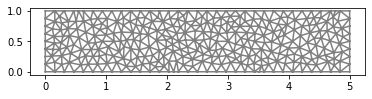

In [ ]:
L = 5.
H = 1.

domain_vertices = [Point(0., 0.),
                   Point(L, 0.),
                   Point(L, H),
                   Point(0., H)
                  ]

domain = Polygon(domain_vertices)

mesh = generate_mesh(domain, 20)

plot(mesh)

In [ ]:
V = VectorElement('P', mesh.ufl_cell(), 2)
Q = FiniteElement('P', mesh.ufl_cell(), 1)

X = FunctionSpace(mesh, MixedElement([V, Q]))

gD = Expression(('near(x[0], 0) ? 1.0 : 0.0', '0.0'), degree=4)

# Dirichlet conditions everywhere, except on the right boundary
def dirichlet_boundary(x, on_boundary):
    return on_boundary and not near(x[0], L)

bc_u = DirichletBC(X.sub(0), gD, dirichlet_boundary)

mu = Constant(1e-3)
f = Constant((0., 0.))
u, p = TrialFunctions(X)
v, q = TestFunctions(X)

a = mu * inner(grad(u), grad(v)) * dx - p * div(v) * dx - div(u) * q * dx

F = dot(f, v) * dx

x = Function(X)
solve(a==F, x, bc_u)

u, p = x.split()

Solving linear variational problem.


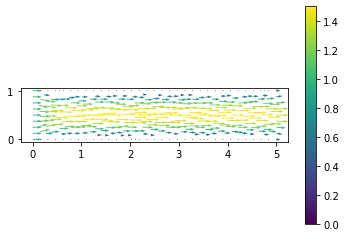

In [ ]:
import matplotlib.pyplot as plt
#q = plot(sqrt(dot(u, u)))
q = plot(u)
plt.colorbar(q)

As expected, the centerline velocity is 3/2.

Object cannot be plotted directly, projecting to piecewise linears.


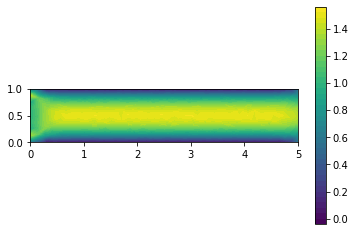

In [ ]:
q = plot(sqrt(dot(u, u)))
plt.colorbar(q)

\It can be checked that the pressure gradient away from the inlet is uniform and close to the exact value of 0.012 Pa/m (this is easier to check in Paraview).

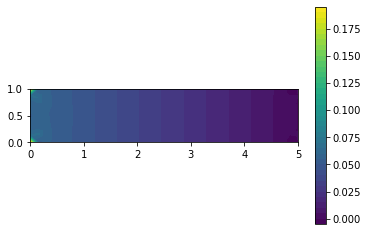

In [ ]:
q = plot(p)
plt.colorbar(q)

In [ ]:
u_poiseuille = Expression(('6/(H*H) * x[1] * (H - x[1])', '0.'), H=H, degree=4)

The exact solution is reproduced very well away from the inlet and from the outlet.

Object cannot be plotted directly, projecting to piecewise linears.


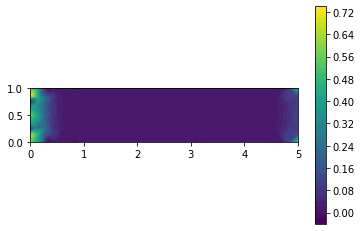

In [ ]:
err = u_poiseuille-u
q = plot(sqrt(dot(err, err)))

plt.colorbar(q)

More post-processing can be done using Paraview.

In [ ]:
u.rename('velocity', 'velocity')
p.rename('pressure', 'pressure')

File('poiseuille/poiseuille-u.pvd') << u
File('poiseuille/poiseuille-p.pvd') << p